# Table of Contents
 <p>

In [1]:
import pandas as pd
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
import epistasis as epi

from matplotlib import rc

import os
rc('text', usetex=True)
rc('text.latex', preamble=r'\usepackage{cmbright}')
rc('font', **{'family': 'sans-serif', 'sans-serif': ['Helvetica']})


%matplotlib inline

# This enables SVG graphics inline. 
%config InlineBackend.figure_formats = {'png', 'retina'}

# JB's favorite Seaborn settings for notebooks
rc = {'lines.linewidth': 2, 
      'axes.labelsize': 18, 
      'axes.titlesize': 18, 
      'axes.facecolor': 'DFDFE5'}
sns.set_context('notebook', rc=rc)
sns.set_style("dark")

mpl.rcParams['xtick.labelsize'] = 16 
mpl.rcParams['ytick.labelsize'] = 16 
mpl.rcParams['legend.fontsize'] = 14

In [2]:
strains =['ps4187', 'ps4087', 'ps4176', 'ew15', 'mt21245', 'mt4866','n2731', 'n2376', 'n767', 'n2731-n767', 'tm1489',
          'n3809', 'n3917', 'n745', 'n767-tm1489', 'n2731-tm1489',
          'ia4', 'ok1402', 'ok161', 'sa307', 'sa307-ok161', 'sa307-ia4',
          'q71']

strain_dict = {}
for i, g in enumerate(strains):
    strain_dict[g] = i

In [3]:
q = 0.1

In [4]:
genmap = pd.read_csv('../sleuth/rna_seq_info.txt', sep=' ', comment='#')
tidy  = pd.read_csv('../input/quantifications.csv')

In [5]:
def get_x_and_y_from_df(overlap, df, strain1, strain2):
    x = tidy[(tidy.strain==strain1) & (tidy.target_id.isin(overlap))].b.values
    y = tidy[(tidy.strain==strain2) & (tidy.target_id.isin(overlap))].b.values

    se_x = tidy[(tidy.strain==strain1) & (tidy.target_id.isin(overlap))].se_b.values
    se_y = tidy[(tidy.strain==strain2) & (tidy.target_id.isin(overlap))].se_b.values
    
    return x, y, se_x, se_y

In [26]:
overlap = epi.find_overlap(['ps4087', 'ps4187'], tidy)
overlap_ens_gene = tidy[(tidy.target_id.isin(overlap))].ens_gene.unique()
print(len(overlap))
n = len(tidy[(tidy.strain == 'ps4187') & (tidy.qval < q)].target_id.unique())
print(len(overlap)/n)

322
0.7318181818181818


The PS4187 (Weak Allele) has an effect size of 0.61x (+/- 0.018) of PS4087 (Strong Allele)


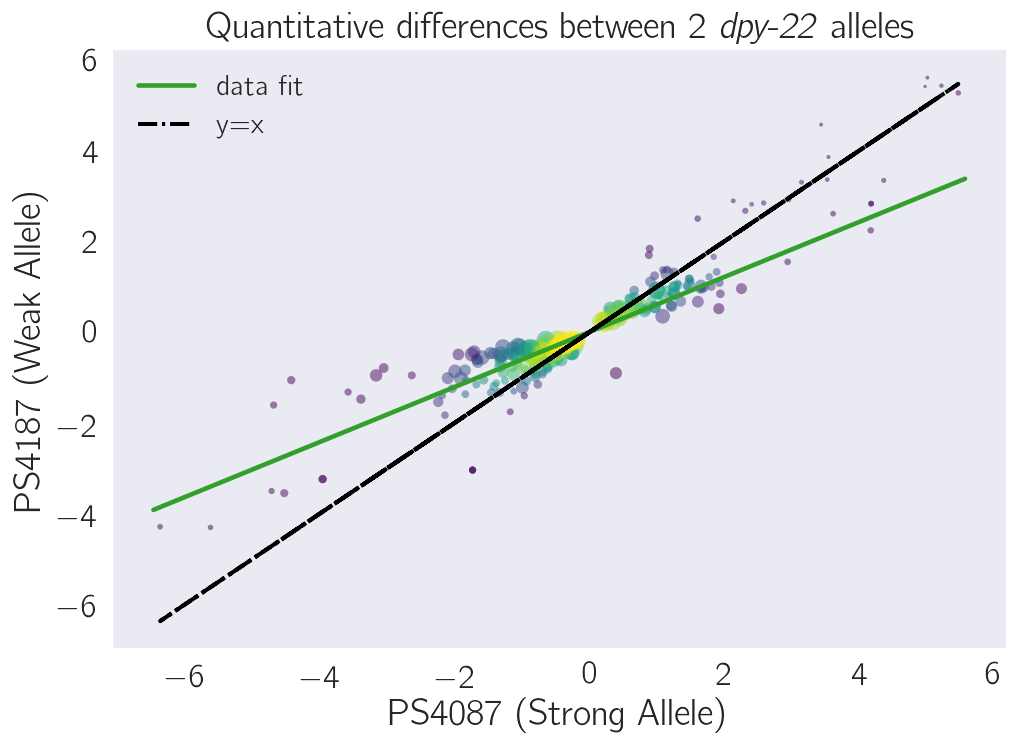

In [7]:
x, y, se_x, se_y = get_x_and_y_from_df(overlap, tidy, 'ps4087', 'ps4187')

odr = epi.perform_odr(x, y, se_x, se_y, beta0=[0.5])
epi.epiplot(x, y, se_y, s0=5, beta=odr.beta[0])
plt.plot(x, x, 'k', ls='-.', label='y=x')

plt.legend()
plt.xlabel('PS4087 (Strong Allele)')
plt.ylabel('PS4187 (Weak Allele)')

plt.title('Quantitative differences between 2 \emph{dpy-22} alleles')

plt.savefig('../output/dpy22_strong_vs_weak_alleles.svg', bbox_inches='tight')
print('The PS4187 (Weak Allele) has an effect size of {0:.2g}x (+/- {1:.2g}) of PS4087 (Strong Allele)'.format(odr.beta[0], odr.sd_beta[0]))

The PS4176 trans-heterozygote is equivalent to the weak allele: 1.1  +/- 0.031


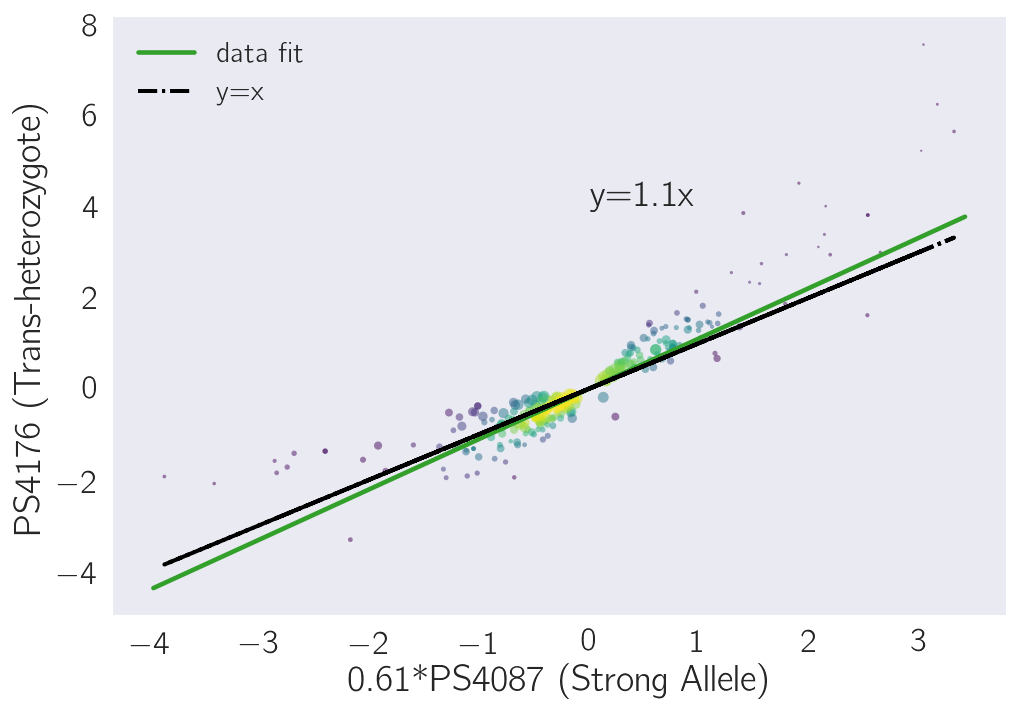

In [8]:
x, y, se_x, se_y = get_x_and_y_from_df(overlap, tidy, 'ps4087', 'ps4176')

norm = odr.beta[0]
odr = epi.perform_odr(norm*x, y, norm*se_x, se_y)
epi.epiplot(norm*x, y, se_y, s0=2, beta=odr.beta[0])
plt.plot(norm*x, norm*x, 'k', ls='-.', label='y=x')

plt.legend()
plt.xlabel('{0:.2g}*PS4087 (Strong Allele)'.format(norm))
plt.ylabel('PS4176 (Trans-heterozygote)')

plt.annotate('y={0:.2g}x'.format(odr.beta[0]), (0, 4), fontsize=18)

plt.savefig('../output/trans_het_vs_61strong_allele.svg', bbox_inches='tight')
print('The PS4176 trans-heterozygote is equivalent to the weak allele: {0:.2g}  +/- {1:.2g}'.format(odr.beta[0], odr.sd_beta[0]))

The PS4176 trans-heterozygote is equivalent to the weak allele: 1.1  +/- 0.027


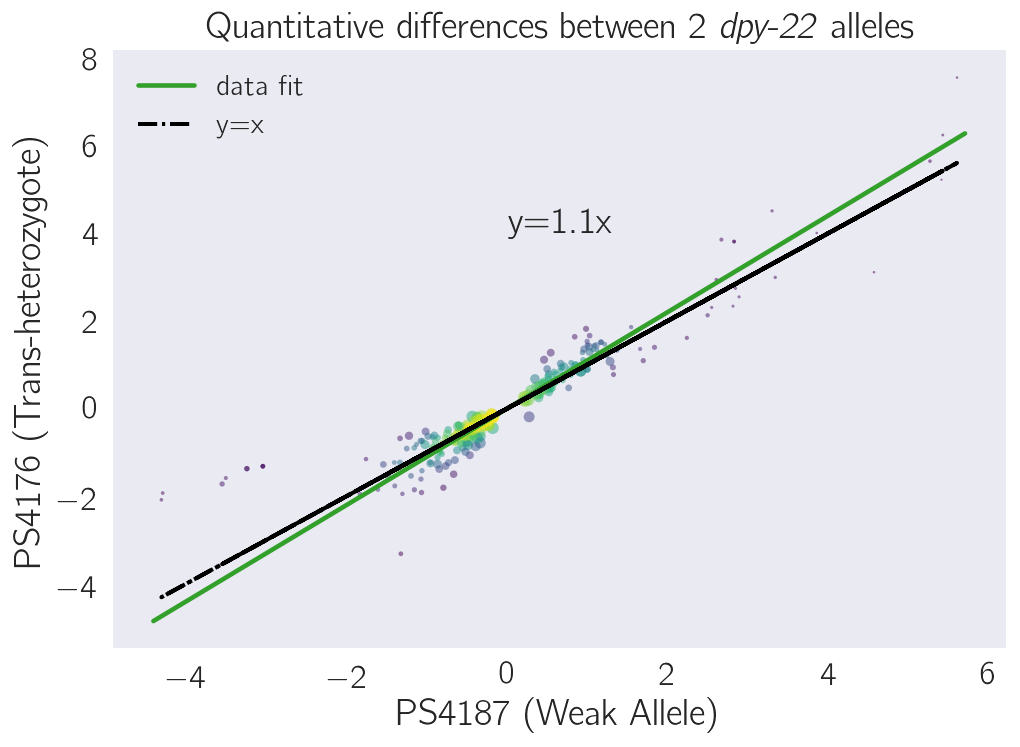

In [9]:
strain1 = 'ps4187'
strain2 = 'ps4176'

x, y, se_x, se_y = get_x_and_y_from_df(overlap, tidy, strain1, strain2)

odr = epi.perform_odr(x, y, se_x, se_y)
epi.epiplot(x, y, se_y, s0=2, beta=odr.beta[0])
plt.plot(x, x, 'k', ls='-.', label='y=x')
plt.annotate('y={0:.2g}x'.format(odr.beta[0]), (0, 4), fontsize=18)

plt.legend()
plt.xlabel('PS4187 (Weak Allele)')
plt.ylabel('PS4176 (Trans-heterozygote)')

plt.title('Quantitative differences between 2 \emph{dpy-22} alleles')

plt.savefig('../output/trans_het_vs_weak_allele.svg', bbox_inches='tight')
print('The PS4176 trans-heterozygote is equivalent to the weak allele: {0:.2g}  +/- {1:.2g}'.format(odr.beta[0], odr.sd_beta[0]))

0.4338786639400136
The ps4176 trans-het is less perturbed than ps4087 (strong allele): 0.77  +/- 0.014


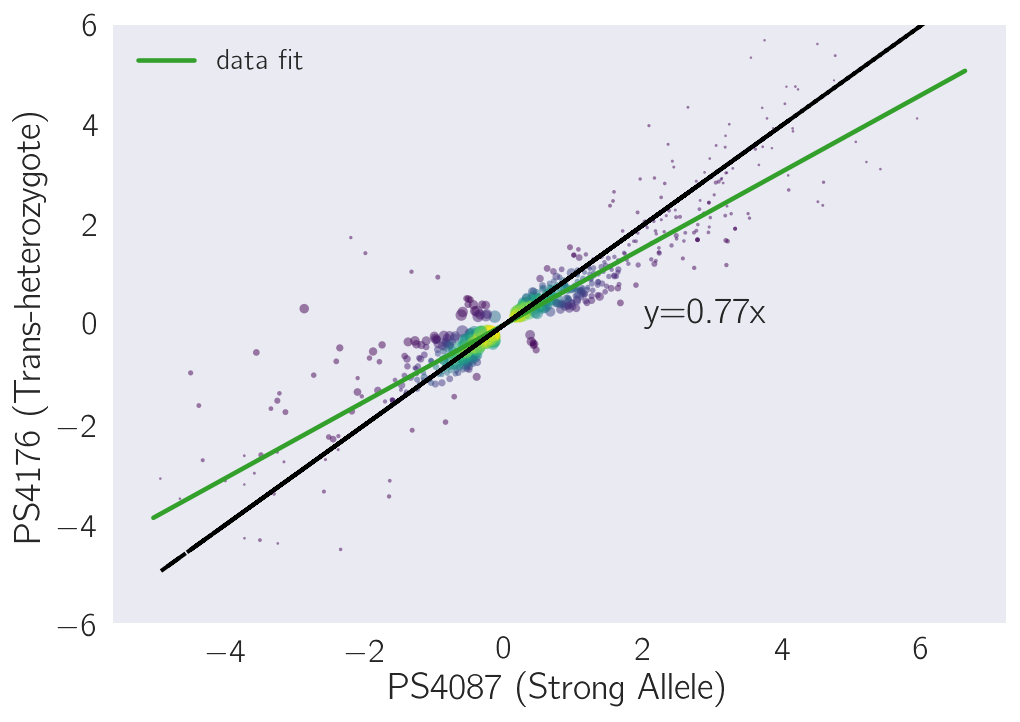

In [13]:
strain1 = 'ps4087'
strain2 = 'ps4176'

overlap2 = epi.find_overlap([strain1, strain2], tidy)
overlap_ens_gene = tidy[(~tidy.target_id.isin(overlap)) & (tidy.target_id.isin(overlap2))].target_id.unique()

print(len(overlap2)/len(tidy[(tidy.strain == 'ps4087') & (tidy.qval < q)]))

x, y, se_x, se_y = get_x_and_y_from_df(overlap_ens_gene, tidy, strain1, strain2)

odr = epi.perform_odr(x, y, se_x, se_y)
epi.epiplot(x, y, se_y, s0=2, beta=odr.beta[0])
plt.plot(x, x, 'k', ls='-.', label='y=x')

plt.xlabel('PS4087 (Strong Allele)')
plt.ylabel('PS4176 (Trans-heterozygote)')
plt.annotate('y={0:.2g}x'.format(odr.beta[0]), (2, 0), fontsize=18)

plt.ylim(-6, 6)
# plt.title('Quantitative differences between 2 \emph{dpy-22} alleles')

plt.savefig('../output/trans_het_vs_strong_largeoverlap.pdf', bbox_inches='tight')
message = 'The {0} trans-het is less perturbed than {1} (strong allele): {2:.2g}  +/- {3:.2g}'
print(message.format(strain2, strain1,odr.beta[0], odr.sd_beta[0]))

1.0528253826451668 0.638431306102
0.6329889719383933 0.36752753606
1.0787303955982575 0.649922363904


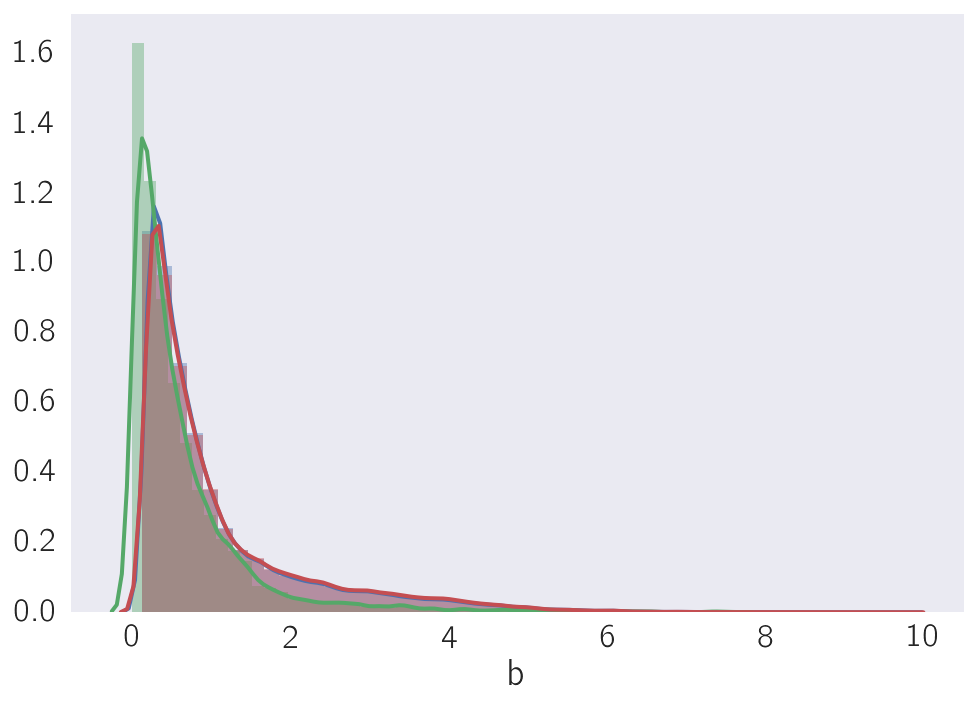

In [25]:
x = np.abs(tidy[(~tidy.target_id.isin(overlap)) & (tidy.qval < q)].b)
y = np.abs(tidy[(tidy.target_id.isin(overlap))].b)
z = np.abs(tidy[(~tidy.target_id.isin(overlap)) & (~tidy.target_id.isin(overlap_ens_gene)) & (tidy.qval < q)].b)

sns.distplot(x)
sns.distplot(y)
sns.distplot(z)

print(x.mean(), np.median(x))
print(y.mean(), np.median(y))
print(z.mean(), np.median(z))

In [11]:
x, y, xy = epi.find_STP(['ps4087', 'ps4187'], 'ps4176', tidy)

Beta: [-0.19690116]
Beta Std Error: [ 0.01934421]
Beta Covariance: [[ 0.00014205]]
Residual Variance: 2.6342130912082733
Inverse Condition #: 1.0
Reason(s) for Halting:
  Sum of squares convergence


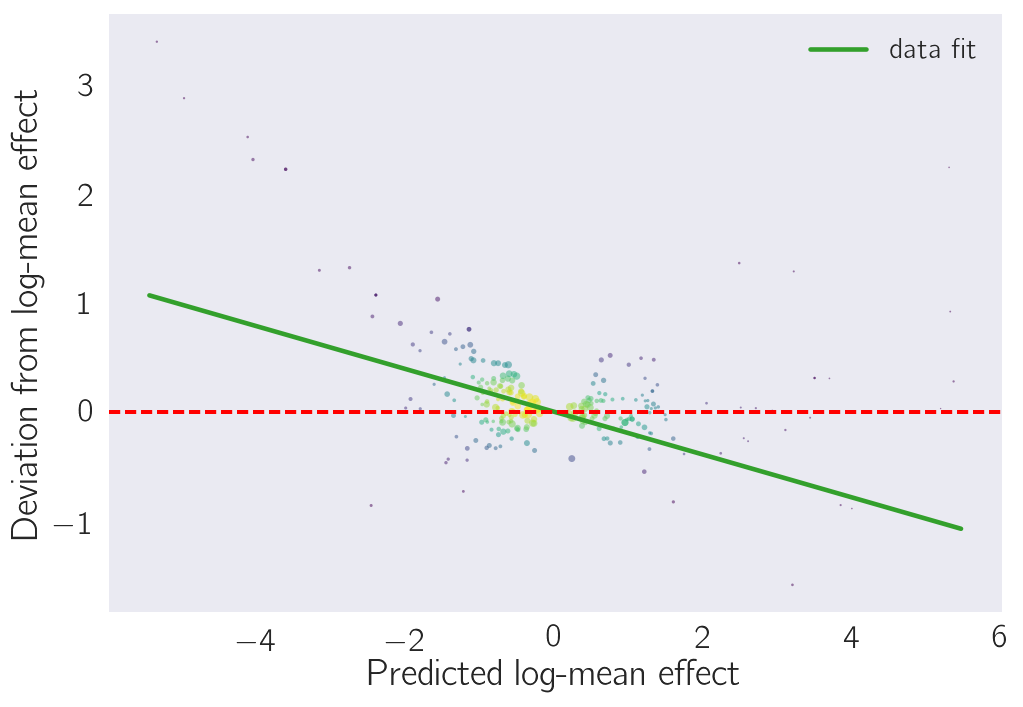

In [12]:
X = 1/2*(x.b.values + y.b.values)

se_x = x.se_b.values
se_y = y.se_b.values
se = np.sqrt(se_x**2 + se_y**2)
se_Y = np.sqrt(se**2/4 + xy.se_b.values**2)
odr = epi.perform_odr(X, xy.b.values - X, se/2, se_Y)

ax = epi.epiplot(X, xy.b.values - X, se_Y/5, s0=.2, beta=odr.beta[0])

plt.axhline(0, ls='--', color='red')
plt.xlabel('Predicted log-mean effect')
plt.ylabel('Deviation from log-mean effect')
plt.legend()
odr.pprint()